## INGENIAS - Grupo 6. Aprendizaje No Supervisado - Modelos de Clustering

## Carga de datos

In [1]:
#Importamos librerías con las que se van a trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

###  Aprendizaje No Supervisado

### 1) Bases

A continuación, se cargan las bases de datos que ya pasaron por el EDA y que están preparadas para ser utilizadas en el modelo

In [2]:
personas=pd.read_csv('../datos/personas_para_modelado.csv')

In [3]:
viajes=pd.read_csv('../datos/viajes_para_modelado.csv')

###  2) Procesamiento y transformación de datos 

In [4]:
#Leemos las primera 5 filas del dataset "Viajes"
viajes.head()

,Unnamed: 0,id_hogar,id_persona,id_viaje,actividad_en_el_origen,actividad_en_el_destino,BH_NBH,motivo,veces_por_semana_viaja,tarifa_combinada,...,hora_final,duracion_minutos,modo_desplazamiento,PONDERA,cantidad_etapas,tipo_viaje,menos_2_cuadras,Inluye_bici,viaja_rmba,distancia_viaje_km
0,0,1,2,1,1,2,BH,2,5,0,...,10.666667,40.0,5,503,1,PBA,0,no,1,4.387573
1,1,1,2,2,2,1,BH,2,5,0,...,17.666667,40.0,5,503,1,PBA,0,no,1,4.387573
2,2,2,1,1,1,3,BH,3,88,0,...,10.250000,60.0,4,464,1,PBA,0,no,1,11.885378
3,3,2,1,2,3,1,BH,3,88,0,...,13.000000,60.0,4,464,1,PBA,0,no,1,11.885378
4,4,3,1,1,1,7,BH,7,88,0,...,12.000000,180.0,3,462,1,PBA,0,no,1,12.408573


In [5]:
#Leemos las primera 5 filas del dataset "Personas"
personas.head()

,Unnamed: 0,id_hogar,id_persona,partido,nombre_partido,edad,sexo,relacion_con_jefe_de_hogar,dificultad,cursa_actualmente,...,trabaja_como,forma_aporte,ambito_laboral,ambito_laboral_otro,cobertura,lugar_atencion,licencia_de_conducir,viajo_ayer,motivos_no_viajo_ayer,PONDERA
0,0,1,1,6119,BRANDSEN,59.0,2,1,7,2,...,0,0,0,0,1,1,2,2,1,187
1,1,1,2,6119,BRANDSEN,64.0,1,2,7,2,...,2,1,1,0,1,1,1,1,0,503
2,2,1,3,6119,BRANDSEN,82.0,2,4,3,2,...,0,0,0,0,1,1,2,2,1,205
3,4,2,2,6119,BRANDSEN,7.0,2,3,7,1,...,0,0,0,0,5,1,2,2,1,232
4,5,2,3,6119,BRANDSEN,5.0,1,3,7,1,...,0,0,0,0,5,1,2,2,1,310


In [6]:
# Visualizamos las columnas del dataset "Viajes"
viajes.columns

Index(['Unnamed: 0', 'id_hogar', 'id_persona', 'id_viaje',
       'actividad_en_el_origen', 'actividad_en_el_destino', 'BH_NBH', 'motivo',
       'veces_por_semana_viaja', 'tarifa_combinada', 'jur_origen',
       'jur_destino', 'partido_origen_viaje', 'partido_destino_viaje',
       'cod_partido_origen', 'cod_partido_destino', 'hora_inicio',
       'hora_final', 'duracion_minutos', 'modo_desplazamiento', 'PONDERA',
       'cantidad_etapas', 'tipo_viaje', 'menos_2_cuadras', 'Inluye_bici',
       'viaja_rmba', 'distancia_viaje_km'],
      dtype='object')

In [7]:
#Visualizamos las columnas del dataset "Personas"
personas.columns

Index(['Unnamed: 0', 'id_hogar', 'id_persona', 'partido', 'nombre_partido',
       'edad', 'sexo', 'relacion_con_jefe_de_hogar', 'dificultad',
       'cursa_actualmente', 'nivel_cursando', 'ambito_cursando',
       'nivel_aprobado', 'Trabaja_Si_No (0=SD)', 'situacion_laboral',
       'por_que_no_trabajo', 'por_que_no_trabajo_otro',
       'por_que_no_tiene_empleo_remunerado', 'por_que_no_tiene_empleo_otro',
       'trabaja_como', 'forma_aporte', 'ambito_laboral', 'ambito_laboral_otro',
       'cobertura', 'lugar_atencion', 'licencia_de_conducir', 'viajo_ayer',
       'motivos_no_viajo_ayer', 'PONDERA'],
      dtype='object')

In [8]:
#Eliminamos todas aquellas columnas del dataset "Viajes" que no se requieran en el modelo. 
viajes.drop(labels=['Unnamed: 0', 'id_viaje',
       'actividad_en_el_origen', 'actividad_en_el_destino', 'BH_NBH', 'motivo', 'cantidad_etapas',
       'veces_por_semana_viaja', 'tarifa_combinada', 'jur_origen',
       'jur_destino', 'partido_origen_viaje', 'partido_destino_viaje',
       'cod_partido_origen', 'cod_partido_destino', 'modo_desplazamiento', 'hora_inicio',
       'hora_final', 'PONDERA',
        'tipo_viaje', 'menos_2_cuadras', 'Inluye_bici',
       'viaja_rmba'], axis=1, inplace=True ) #Saqué el "modo_des" porque da error


In [9]:
#Eliminamos todas aquellas columnas del dataset "Personas" que no se requieran en el modelo. 
personas.drop(labels=['Unnamed: 0', 'partido', 'nombre_partido',
        'relacion_con_jefe_de_hogar', 'dificultad',
       'cursa_actualmente', 'nivel_cursando', 'ambito_cursando',
       'nivel_aprobado', 'Trabaja_Si_No (0=SD)', 'situacion_laboral',
       'por_que_no_trabajo', 'por_que_no_trabajo_otro',
       'por_que_no_tiene_empleo_remunerado', 'por_que_no_tiene_empleo_otro',
       'trabaja_como', 'forma_aporte', 'ambito_laboral', 'ambito_laboral_otro',
       'cobertura', 'lugar_atencion', 'licencia_de_conducir', 'viajo_ayer',
       'motivos_no_viajo_ayer', 'PONDERA'], axis=1, inplace=True)


A continuación se unirán los datasets "Personas" con "Viajes", de manera que el Modelo pueda considerar algunas características de las personas que viajan.

In [10]:
mov_tp = pd.merge(viajes, personas, on=['id_persona', 'id_hogar'], how='inner')

In [11]:
#Verificamos la presencia de datos nulos en el nuevo dataset originado.
mov_tp.isna().sum()

id_hogar              0
id_persona            0
duracion_minutos      0
distancia_viaje_km    0
edad                  0
sexo                  0
dtype: int64

In [12]:
#Eliminamos las columnas del dataset "mov_tp" que nos sirvieron para la unión de las bases originales y que no se requieren en el modelo. 
mov_tp.drop(labels=['id_hogar', 'id_persona'], axis=1, inplace=True )

In [13]:
#Visualizamos las columnas del dataset "mov_tp".
mov_tp.columns

Index(['duracion_minutos', 'distancia_viaje_km', 'edad', 'sexo'], dtype='object')

###  2) Modelos No Supervisado

Seleccionamos variables para los modelos: en este caso elegimos duracion_minutos, distancia_viaje_km, edad y sexo, para observar si existe un agrupamiento en función de ellas.

In [14]:
#Escalamos todas las variables del dataset "mov_tp" y las almacenamos en la una nueva variable denominada "X".
scaler = StandardScaler()
scaler.fit(mov_tp)
X = scaler.transform(mov_tp)

In [15]:
#Visualizamos los un valores almacenados en "X".
X

array([[ 0.31567344, -0.07472981,  1.2446169 , -1.08573059],
       [ 0.31567344, -0.07472981,  1.2446169 , -1.08573059],
       [ 4.98947849,  0.78955417,  1.0113407 , -1.08573059],
       ...,
       [-0.71924054,  2.14550372, -0.20169554,  0.9210388 ],
       [-0.71924054,  2.14551647, -0.20169554,  0.9210388 ],
       [-0.68585621,  2.14550372, -0.20169554,  0.9210388 ]])

Aplicaremos "El Método del Codo" para visualizar la variación total explicada (inercia) por el modelo en relación con el número de clústers. Posteriormente, seleccionaremos el número de clústers donde se observa una marcada disminución en la variación, indicando un punto donde la adición de más clústers no proporciona un beneficio significativo en la explicación de la variabilidad en los datos.

In [16]:
# Calculamos los distintos valores de inercia para clusters que van de 1 a 14 y luego graficamos los resultados.
K = np.arange(1, 15)
lista_inercias = []

for i in K:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  lista_inercias.append(kmeans.inertia_)

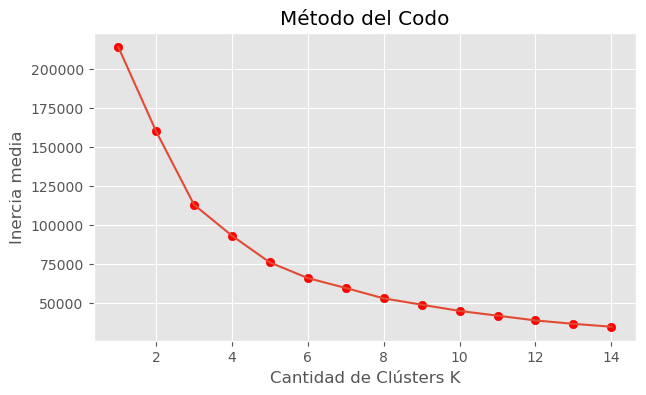

In [17]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clústers K')
plt.ylabel('Inercia media')
plt.title('Método del Codo')
plt.show()

De este gráfico observamos que el número de clusters donde la disminución en la variación se empieza a aplanar, es decir, el "codo", es 8 clusters.

In [18]:
# Calculamos los distintos coeficientes de silhouette para cada clusters (1 al 14) y luego graficamos los resultados
K = np.arange(2,15)
lista_silueta = []
for i in K:
  kmeans_silueta = KMeans(n_clusters = i, random_state = 0)
  kmeans_silueta.fit(X)
  lista_silueta.append(silhouette_score(X, kmeans_silueta.labels_))

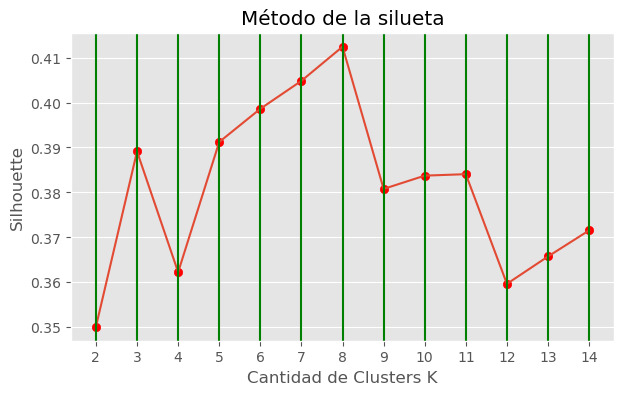

In [19]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_silueta)
plt.scatter(K,lista_silueta,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette')
plt.title('Método de la silueta')
plt.xticks(np.arange(2,15))
for x in np.arange(2,15):
  plt.axvline(x,0,1,color='green')
plt.show()

De este gráfico observamos que el número de clústers donde se obtiene el coefiente más alto es 8, número que se condice con el sugerido por el Método del Codo. 

A fin de comprobar si 8 es una cantidad de clústers precisa, aplicamos el Índice de Davies Bouldin para así evaluar la calidad de los clústers considerando tanto la cohesión intra-clúster como la separación inter-clúster. 

In [21]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
db_index = davies_bouldin_score(X, labels)
print(f"Índice Davies-Bouldin: {db_index}")

Índice Davies-Bouldin: 0.9682128952327893


Un índice Davies-Bouldin de 0.9682128952327893 para 8 clústeres es un valor bastante bajo, lo cual es positivo en términos de calidad de la partición de clústeres. 

In [22]:
# Modelamos utilizando el Método de KMeans
kmeansmodel = KMeans(n_clusters= 8, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [23]:
# Obtenemos las etiquetas para cada clúster.
etiquetas_kmeans = kmeansmodel.labels_
np.unique(etiquetas_kmeans)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [24]:
# Calculamos los centros para cada clúster.
centros = kmeansmodel.cluster_centers_
print(centros)

[[ 1.27666877  0.54623815  0.11499393  0.9210388 ]
 [-0.34741146 -0.2904599   1.00549986  0.9210388 ]
 [-0.38006119 -0.30487038 -0.91485969 -1.08573059]
 [-0.34482178 -0.23221073  1.013487   -1.08573059]
 [ 1.15466716  0.79253181  0.04849191 -1.08573059]
 [-0.40843235 -0.32580908 -0.74052624  0.9210388 ]
 [ 5.53885558 14.16861335  0.41955581 -0.27598153]
 [ 2.76765045  3.16807744  0.15850117 -0.30761661]]


Una vez establecidos los clústers, podremos observar la cantidad de puntos asignados a cada clúster.

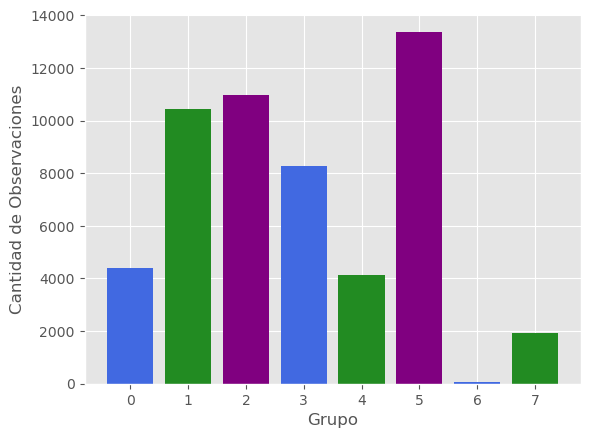

In [25]:
cluster_counts = np.bincount(y_kmeans)
cluster_labels = list(range(len(cluster_counts)))
colors = ['royalblue', 'forestgreen', 'purple']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show() 

#### Evaluación con Suma de los Cuadrados de las Distancias (SSD)

In [26]:
# Calcula la SSD
SSD = kmeansmodel.inertia_
print("SSD: ", SSD)

SSD:  53034.48328234633


Esta métrica mide la distancia entre cada punto y su centroide asignado, y luego suma los cuadrados de estas distancias. La SSD es una medida de cómo de bien los centroides representan los puntos en el dataset, y se espera que disminuya a medida que se ajusta el modelo.
- Una SSD baja indica que los puntos dentro de un mismo clúster son muy similares entre sí, lo que sugiere que los clústers son coherentes y bien definidos.
Este resultado nos sugiere que los clústers obtenidos por el algoritmo K-means son relativamente coherentes y bien definidos.

#### Evaluación con Silhouette

In [27]:
silhouette_coef = silhouette_score(X, etiquetas_kmeans)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef)

Coeficiente de Silueta para KMeans:  0.4124062445497461


El coeficiente de Silueta de 0.41 sugiere que los clústers tienen una buena separación, ya que el valor está más cerca de 1 que de 0. Esto indica que los puntos están generalmente bien definidos en sus respectivos clústers y no están demasiado cerca de los límites. Por lo tanto, podemos inferir que la asignación de los datos a los clústers proporciona una segmentación coherente y que los clústers están relativamente bien separados.

In [28]:
# Transformamos las etiquetas en un data frame y despues las mergeamos al dataset "mov_tp". De esta manera podemos visualizar qué cluster fue asignado a cada una de nuestras muestras
cluster_df = pd.DataFrame(etiquetas_kmeans, columns=['cluster'])
df_merged = pd.merge(mov_tp, cluster_df, right_index=True, left_index=True)

In [29]:
#Visualizamos el dataset mergeado.
df_merged

,duracion_minutos,distancia_viaje_km,edad,sexo,cluster
0,40.0,4.387573,64.0,1,3
1,40.0,4.387573,64.0,1,3
2,180.0,12.408573,59.0,1,7
3,19.0,12.390517,59.0,1,3
4,20.0,11.705717,14.0,1,2
...,...,...,...,...,...
53609,30.0,22.264433,38.0,1,4
53610,10.0,24.885109,33.0,2,5
53611,9.0,24.992483,33.0,2,5
53612,9.0,24.992601,33.0,2,5


In [30]:
# Calculamos los valores medios para cada uno de los clústers.
df_merged.groupby(['cluster'])['duracion_minutos', 'distancia_viaje_km', 'edad', 'sexo'].mean() 

,duracion_minutos,distancia_viaje_km,edad,sexo
cluster,,,,
0,68.823783,10.159334,39.775764,2.000000
1,20.143541,2.387193,58.871684,2.000000
2,19.171970,2.254554,17.720252,1.000000
3,20.224864,2.926189,59.039831,1.000000
4,65.179574,12.450217,38.373669,1.000000
5,18.312299,2.057536,21.451364,2.000000
6,196.456140,136.573128,46.315789,1.403509
7,113.461340,34.493660,40.741753,1.387113


A partir de la tabla anterior y los gráficos previamente realizados, se puede ver que se formaron 8 clústers con las siguientes características:

Cluster 0: La agrupación contiene únicamente mujerss, con una edad promedio de 40 años que realizan viajes de una distancia promedio de 10 km, con una duración promedio de 69 minutos. 

Cluster 1: La agrupación contiene únicamente mujeres, con una edad promedio de 59 años que realizan viajes de una distancia promedio de 2 km, con una duración promedio de 20 minutos. 

Cluster 2: La agrupación contiene únicamente hombres, con una edad promedio de 18 años que realizan viajes de una distancia promedio de 2 km, con una duración promedio de 19 minutos.

Cluster 3: La agrupación contiene únicamente hombres, con una edad promedio de 59 años que realizan viajes de una distancia promedio de 3 km, con una duración promedio de 20 minutos. 

Cluster 4: La agrupación contiene únicamente hombres, con una edad promedio de 39 años que realizan viajes de una distancia promedio de 13 km, con una duración promedio de 66 minutos.

Cluster 5: La agrupación contiene únicamente mujeres, con una edad promedio de 21 años que realizan viajes de una distancia promedio de 2 km, con una duración promedio de 18 minutos. 

Cluster 6: Puede interpretarse como una composición que está más cerca de Hombres que de Mujeres, pero con cierta presencia de ambos, con una edad promedio de 47 años que realizan viajes de una distancia promedio de 136 km, con una duración promedio de 196 minutos. 

Cluster 7: Con una composición ligeramente más inclinada hacia Hombres que el Clúster 6, con una edad promedio de 41 años, que realizan viajes de una distancia promedio de 34 km y con una duración promedio de 113 minutos.

Estas agrupaciones fueron tomadas para explorar hipótesis en los patrones de movilidad de hombres y mujeres y para delinear interpretaciones a cotejar con los Análisis Descriptivos previos y los resultados de los Modelos ejecutados.